In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import IPython
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell

# InteractiveShell.ast_node_interactivity = "all"
# CSS = """
# .output {
#     flex-direction: row;
# }
# """
# HTML('<style>{}</style>'.format(CSS))
# pd.set_option('display.max_columns', None)

---

## Mapping categories to DF1 and removing outliers below

In [2]:
df1 = pd.read_csv('./data/0826export_column_filter_1.csv')
df1.columns = df1.columns.str.lower()

df2 = pd.read_excel('./documentation/store_master.xlsx')
df2.columns = df2.columns.str.lower()

categories_to_map = ['class', 
                     'store_city', 
                     'store_state', 
                     'close_date', 
                     'gross_feet'] # must be df2's LOWERED column names

def map_my_dataframe(df1, df2, a_list):
    """Returns DataFrame(df1)
    maps str items in a_list, from df2 onto df1.
    the joint variable for mapping is the store number.
    
    !! df1 and df2 column names must be lower-case !!
    """
    joint_var = 'store'
    for category in a_list:
        df_2_dict = dict(zip(df2[joint_var], df2[category]))
        df1[category] = df1[joint_var].map(df_2_dict)
    return df1
    
df = map_my_dataframe(df1, df2, categories_to_map)
df = df[df.store != 2084]

closed = df[df.close_date.notna()]

---

### Remove outlier store(2084), make DF for closed stores.

---

## Compare all variables by top/bot `COMP_PCT` by `STORE`:

Grouping DataFrames's by `'store'`, `'mean()'` of:
 - `df1`: full original data frame
 - `top_avg`: top by `comp_pct`
 - `bot_avg`: bottom by `comp_pct`
 - `closed_avg`: by closed store

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

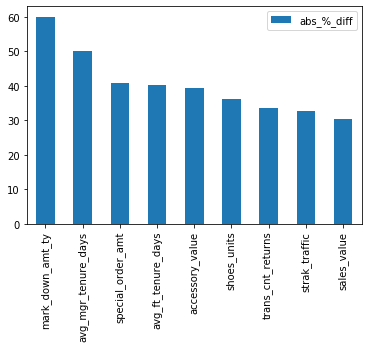

In [55]:
all_avg_by_store = df.groupby(['store']).mean().mean().round(4)
top_avg_by_store = df.groupby(['store']).mean().nlargest(20, 'comp_pct').mean().round(4)
bot_avg_by_store = df.groupby(['store']).mean().nsmallest(20, 'comp_pct').mean().round(4)
closed_avg_by_store = closed.groupby(['store']).mean().mean().round(4)

# Concatenating
for_compare_by_store = pd.concat([
#     all_avg_by_store.rename('all_means').to_frame(),
    top_avg_by_store.rename('top_store_avgs').to_frame(),
    bot_avg_by_store.rename('bot_store_avgs').to_frame(),
    closed_avg_by_store.rename('closed_store_avgs').to_frame()
], axis=1).iloc[3:, :]

# for_compare_by_store

store_top_bot_diff = abs(abs(top_avg_by_store - bot_avg_by_store) / ((top_avg_by_store + bot_avg_by_store) * 0.5) * 100).to_frame('abs_%_diff').nlargest(11, 'abs_%_diff').iloc[2:, :]
store_top_bot_diff

store_top_closed_diff = abs(abs(top_avg_by_store - closed_avg_by_store) / ((top_avg_by_store + closed_avg_by_store) * 0.5) * 100).to_frame('abs_%_diff').nlargest(11, 'abs_%_diff').iloc[2:, :]
store_top_closed_diff.plot(kind='bar')
plt.xticks(rotation=90)

---
## Filter `CLASS`, Compare by top/bot `COMP_PCT` by [`STORE`, `FISCAL_YEAR`] -->  `FISCAL_MONTH`:

### Commented out classes do not have enough stores to do top and bot 10 store difference checks

In [4]:
classes = df['class'].unique()

mall_top = df[df['class'] == classes[0]].groupby(['store','fiscal_year','fiscal_month']).mean().nlargest(10, 'comp_pct').iloc[:, 2:].mean().rename('mall_top').to_frame()
mall_bot = df[df['class'] == classes[0]].groupby(['store','fiscal_year','fiscal_month']).mean().nsmallest(10, 'comp_pct').iloc[:, 2:].mean().rename('mall_bot').to_frame()

# open_air_top = df[df['class'] == classes[1]].groupby(['store','fiscal_year','fiscal_month']).mean().nlargest(10, 'comp_pct').iloc[:, 2:].mean().rename('open_air_top').to_frame()
# open_air_bot = df[df['class'] == classes[1]].groupby(['store','fiscal_year','fiscal_month']).mean().nsmallest(10, 'comp_pct').iloc[:, 2:].mean().rename('open_air_bot').to_frame()

# downtown_top = df[df['class'] == classes[2]].groupby(['store','fiscal_year','fiscal_month']).mean().nlargest(10, 'comp_pct').iloc[:, 2:].mean().rename('downtown_top').to_frame()
# downtown_bot = df[df['class'] == classes[2]].groupby(['store','fiscal_year','fiscal_month']).mean().nsmallest(10, 'comp_pct').iloc[:, 2:].mean().rename('downtown_bot').to_frame()

# street_top = df[df['class'] == classes[3]].groupby(['store','fiscal_year','fiscal_month']).mean().nlargest(10, 'comp_pct').iloc[:, 2:].mean().rename('street_top').to_frame()
# street_bot = df[df['class'] == classes[3]].groupby(['store','fiscal_year','fiscal_month']).mean().nsmallest(10, 'comp_pct').iloc[:, 2:].mean().rename('street_bot').to_frame()

airport_top = df[df['class'] == classes[4]].groupby(['store','fiscal_year','fiscal_month']).mean().nlargest(10, 'comp_pct').iloc[:, 2:].mean().rename('airport_top').to_frame()
airport_bot = df[df['class'] == classes[4]].groupby(['store','fiscal_year','fiscal_month']).mean().nsmallest(10, 'comp_pct').iloc[:, 2:].mean().rename('airport_bot').to_frame()

# lifestyle_top = df1[df1['class'] == classes[5]].groupby(['store']).mean().nlargest(10, 'comp_pct').iloc[:, 2:].mean().rename('lifestyle_top').to_frame()
# lifestyle_bot = df1[df1['class'] == classes[5]].groupby(['store']).mean().nsmallest(10, 'comp_pct').iloc[:, 2:].mean().rename('lifestyle_bot').to_frame()

outlet_top = df[df['class'] == classes[6]].groupby(['store','fiscal_year','fiscal_month']).mean().nlargest(10, 'comp_pct').iloc[:, 2:].mean().rename('outlet_top').to_frame()
outlet_bot = df[df['class'] == classes[6]].groupby(['store','fiscal_year','fiscal_month']).mean().nsmallest(10, 'comp_pct').iloc[:, 2:].mean().rename('outlet_bot').to_frame()

# for_compare_by_class = pd.concat([mall_top, mall_bot, airport_top, airport_bot, outlet_top, outlet_bot], axis=1)
# for_compare_by_class

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

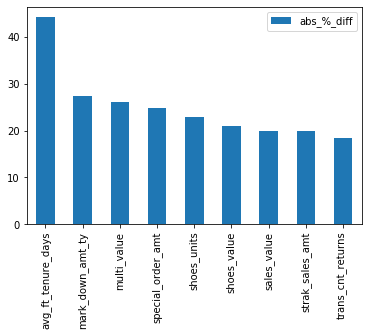

In [54]:
outlet_top = df[df['class'] == classes[6]].groupby(['store','fiscal_year','fiscal_month']).mean().iloc[:, 1:].nlargest(500, 'comp_pct').mean()
outlet_bot = df[df['class'] == classes[6]].groupby(['store','fiscal_year','fiscal_month']).mean().iloc[:, 1:].nsmallest(500, 'comp_pct').mean()


outlet_class_diff = abs(abs(outlet_top - outlet_bot) / ((outlet_top + outlet_bot) * 0.5) * 100).to_frame('abs_%_diff').nlargest(11, 'abs_%_diff').iloc[2:, :]
outlet_class_diff.plot(kind='bar')
plt.xticks(rotation=90)

---

## MALL STORES:
 - #### Absolute percentage(%) differences between averages of top and bot mall stores' variables:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

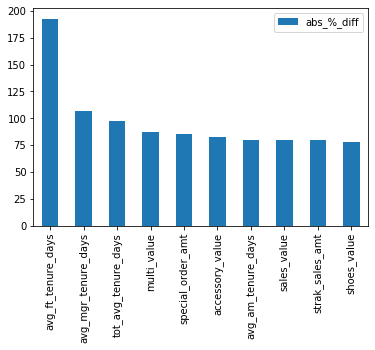

In [53]:
top = mall_top.iloc[1:,0]
bot = mall_bot.iloc[1:,0]
diff_mall = abs(abs(bot - top) / ((bot + top) * 0.5) * 100).to_frame('abs_%_diff').nlargest(11, 'abs_%_diff').iloc[1:, :]
diff_mall.plot(kind='bar')
plt.xticks(rotation=90)

---

## AIRPORT STORES:
 - #### Absolute percentage(%) differences between averages of top and bot airport stores' variables:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

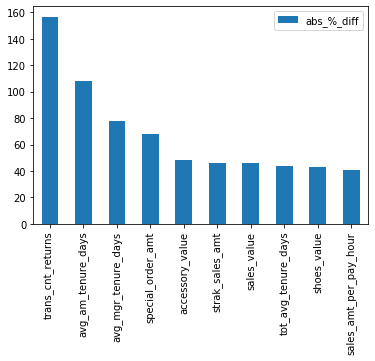

In [52]:
top = airport_top.iloc[1:,0]
bot = airport_bot.iloc[1:,0]
diff_airport = abs(abs(bot-top) / ((bot + top) * 0.5) * 100).to_frame('abs_%_diff').nlargest(11, 'abs_%_diff').iloc[1:, :]
diff_airport.plot(kind='bar')
plt.xticks(rotation=90)

---

## OUTLET STORES: 
 - #### Absolute percentage(%) differences between averages of top and bot outlet stores' variables:

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

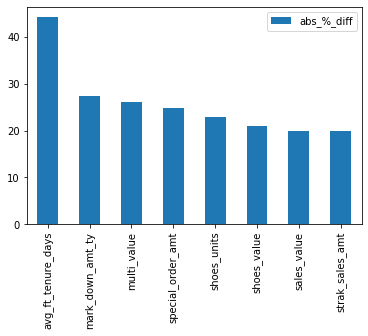

In [51]:
top = outlet_top#.iloc[1:,0]
bot = outlet_bot#.iloc[1:,0]

# outlet store differences
diff_outlet = abs(abs(top-bot) / ((top + bot) * 0.5) * 100).to_frame('abs_%_diff').nlargest(10, 'abs_%_diff').nlargest(11, 'abs_%_diff').iloc[2:, :]
diff_outlet.plot(kind='bar')
plt.xticks(rotation=90)

---

## Compare top/bot `COMP_PCT` by [`STORE`, `FISCAL_YEAR`] --> `FISCAL_MONTH`: 
 - #### Absolute percentage(%) differences between averages of top and bot fiscal months':

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

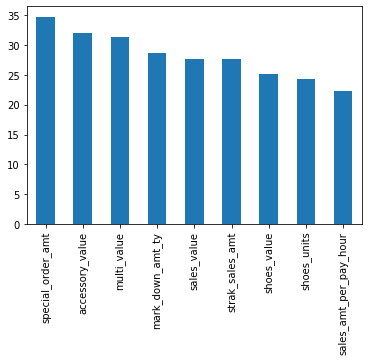

In [50]:
grouped_store_year_month = df.groupby(['store', 'fiscal_year', 'fiscal_month']).mean().iloc[:, 1:]

top_store_month = grouped_store_year_month.nlargest(1000, 'comp_pct').mean()
bot_store_month = grouped_store_year_month.nsmallest(1000, 'comp_pct').mean()

diff_store_month = abs(abs(top_store_month - bot_store_month) / ((top_store_month + bot_store_month) * 0.5) * 100).nlargest(11).iloc[2:]

diff_store_month.plot(kind='bar')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

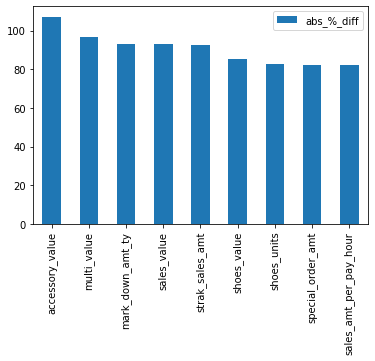

In [49]:
by_store_year = df.groupby([
    'store', 
    'fiscal_year', 
    'fiscal_month',
    'fiscal_week'
]).mean()#.iloc[:, 2:]

# store_top['comp_pct_year'] = 

# store_top#.nlargest(5, 'comp_pct')

store_top = by_store_year.nlargest(100, 'comp_pct').mean()
store_bot = by_store_year.nsmallest(100, 'comp_pct').mean()

diff_store = abs(abs(store_top - store_bot) / ((store_top + store_bot) * 0.5) * 100).to_frame('abs_%_diff').nlargest(11, 'abs_%_diff').iloc[2:, :]
diff_store.plot(kind='bar')
plt.xticks(rotation=90)
# by_store_year

---

## Compare top/bot `COMP_PCT` by [`STORE`, `FISCAL_YEAR`, `FISCAL_MONTH`] --> `FISCAL_WEEK`: 
 - #### Absolute percentage(%) differences between averages of top and bot fiscal weeks' variables:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

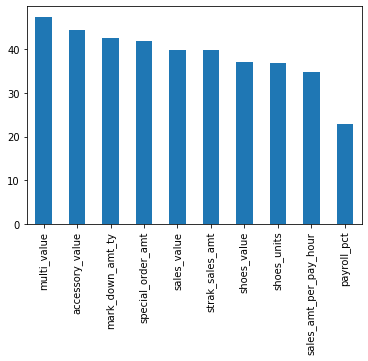

In [48]:
grouped_store_year_month_week = df.groupby(['store', 'fiscal_year', 'fiscal_month', 'fiscal_week']).mean().iloc[:, :]

len(grouped_store_year_month_week)

wk_top = grouped_store_year_month_week.nlargest(5000, 'comp_pct').mean()
wk_bot = grouped_store_year_month_week.nsmallest(5000, 'comp_pct').mean()
diff_week = abs(abs(wk_top - wk_bot) / ((wk_top + wk_bot) * 0.5) * 100).nlargest(12).iloc[2:]

diff_week.plot(kind='bar')
plt.xticks(rotation=90)